# 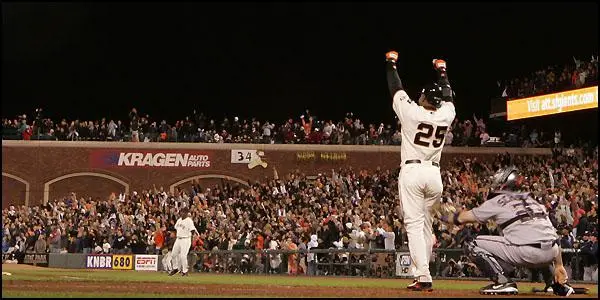

In [1]:
if not 'statsapi' in globals():
    !pip install -q MLB-StatsAPI
!pip install -q pandas
!pip install -q numpy
!pip install -q tabulate
import datetime
from datetime import datetime, timezone,timedelta
import statsapi
import pandas as pd
import numpy as np
def home_run_getter(player_name):
    player_name = player_name
    season = 2025
    game_type = 'r'
    try:
        player_id = next(x['id'] for x in statsapi.get('sports_players', {'season': season, 'gameType': game_type})['people'] if x['fullName'] == player_name)

        # Retrieve and print the player's season stats
        player_stats = statsapi.player_stat_data(player_id, 'hitting', 'season')["stats"][0]["stats"]["homeRuns"]
        return player_stats
    except:
        return 0
def HBP_getter(player_name):
    player_name = player_name
    season = 2025
    game_type = 'r'
    try:
        player_id = next(x['id'] for x in statsapi.get('sports_players', {'season': season, 'gameType': game_type})['people'] if x['fullName'] == player_name)

        # Retrieve and print the player's season stats
        player_stats = statsapi.player_stat_data(player_id, 'hitting', 'season')["stats"][0]["stats"]["hitByPitch"]
        return player_stats
    except:
        return 0

dave_team = ['Salvador Perez', 'Christian Walker', 'Ketel Marte', 'José Ramírez', 'Corey Seager', "Tyler O'Neill", 'Heliot Ramos', 'Adolis García', 'Marcell Ozuna', 'Randy Arozarena']

swank_team = ['Shea Langeliers', 'Vladimir Guerrero Jr.', 'Nolan Gorman', 'Mark Vientos', 'Bobby Witt Jr.', 'Colton Cowser', 'Aaron Judge', 'Juan Soto', 'Brent Rooker', 'CJ Abrams']

teheng_team = ['Cal Raleigh', 'Bryce Harper', 'Marcus Semien', 'Manny Machado', 'Gunnar Henderson', 'Riley Greene', 'Jarren Duran', 'Ronald Acuña Jr.', 'Shohei Ohtani', 'Jurickson Profar']

ethan_team = ['Yainer Diaz', 'Jake Burger', 'Jordan Westburg', 'Matt Chapman', 'Elly De La Cruz', 'Matt Wallner', 'Brenton Doyle', 'Lawrence Butler', 'Kyle Schwarber', 'Isaac Paredes']

bo_team = ['William Contreras', 'Pete Alonso', 'Brandon Lowe', 'Austin Riley', 'Mookie Betts', 'Teoscar Hernández', 'Julio Rodríguez', 'Fernando Tatis Jr.', 'Seiya Suzuki', 'Willi Castro']

dave_score = 0
swank_score = 0
teheng_score = 0
ethan_score = 0
bo_score = 0

for i in range(len(dave_team)):
    if i != len(dave_team)-1:
        dave_score += home_run_getter(dave_team[i])
        swank_score += home_run_getter(swank_team[i])
        teheng_score += home_run_getter(teheng_team[i])
        ethan_score += home_run_getter(ethan_team[i])
        bo_score += home_run_getter(bo_team[i])
    else:
        dave_score += 3*HBP_getter(dave_team[i])
        swank_score += 3*HBP_getter(swank_team[i])
        teheng_score += 3*HBP_getter(teheng_team[i])
        ethan_score += 3*HBP_getter(ethan_team[i])
        bo_score += 3*HBP_getter(bo_team[i])

#putting scores in a pandas DataFrane
data = {"Team":["Dave","Swank","Teheng","Ethan","Bo"],"Score":[dave_score,swank_score,teheng_score,ethan_score -7,bo_score - 22]}

"""
Bo score is subtracted by 22 because of the swap of Suzuki for Alvarez(25 vs 3 hrs @All star Break)
Ethan score is subtracted by 7 because of the swap of Butler for Santander(13 vs 6 hrs @All star break)
"""
df = pd.DataFrame(data).set_index("Team").sort_values("Score",ascending = False)


In [2]:
print(df.to_markdown())

| Team   |   Score |
|:-------|--------:|
| Dave   |     220 |
| Swank  |     213 |
| Teheng |     209 |
| Bo     |     182 |
| Ethan  |     176 |


In [3]:
point_player_dict ={}

In [19]:
dave_dict ={}
s =0
for player in dave_team:
    points = home_run_getter(player)
    if player == dave_team[-1]:
        points = HBP_getter(player)*3
    s+=points
    point_player_dict[player] = {"points":points,"team":"Dave"}
    print(f"player: {player} points: {points}")
s

player: Salvador Perez points: 21
player: Christian Walker points: 16
player: Ketel Marte points: 23
player: José Ramírez points: 25
player: Corey Seager points: 17
player: Tyler O'Neill points: 8
player: Heliot Ramos points: 14
player: Adolis García points: 16
player: Marcell Ozuna points: 20
player: Randy Arozarena points: 60


220

In [20]:
print("player: Yordan Alvarez(no longer on team) points: 3")
bo_dict ={}
s = 3#3 bc of yordan hrs before swap
for player in bo_team:
    points = home_run_getter(player)
    if player == bo_team[-1]:
        points = HBP_getter(player)*3
    if player =="Seiya Suzuki":
        points -=25
    s+=points
    point_player_dict[player] = {"points":points,"team":"Bo"}
    print(f"player: {player} points: {points}")
s

player: Yordan Alvarez(no longer on team) points: 3
player: William Contreras points: 12
player: Pete Alonso points: 28
player: Brandon Lowe points: 24
player: Austin Riley points: 16
player: Mookie Betts points: 12
player: Teoscar Hernández points: 18
player: Julio Rodríguez points: 23
player: Fernando Tatis Jr. points: 17
player: Seiya Suzuki points: 2
player: Willi Castro points: 27


182

In [21]:
swank_dict ={}
s=0
for player in swank_team:
    points = home_run_getter(player)
    if player == swank_team[-1]:
        points = HBP_getter(player)*3
    s+=points
    point_player_dict[player] = {"points":points,"team":"Swank"}
    print(f"player: {player} points: {points}")
s

player: Shea Langeliers points: 24
player: Vladimir Guerrero Jr. points: 19
player: Nolan Gorman points: 10
player: Mark Vientos points: 7
player: Bobby Witt Jr. points: 17
player: Colton Cowser points: 9
player: Aaron Judge points: 38
player: Juan Soto points: 29
player: Brent Rooker points: 24
player: CJ Abrams points: 36


213

In [22]:
print("player: Anthony Santander(no longer on team) points: 6")
ethan_dict ={}
s=6#6 bc of santander hrs before swap
for player in ethan_team:
    points = home_run_getter(player)
    if player == ethan_team[-1]:
        points = HBP_getter(player)*3
    if player =="Lawrence Butler":
        points -=13
    s+=points
    point_player_dict[player] = {"points":points,"team":"Ethan"}
    print(f"player: {player} points: {points}")
s

player: Anthony Santander(no longer on team) points: 6
player: Yainer Diaz points: 17
player: Jake Burger points: 12
player: Jordan Westburg points: 14
player: Matt Chapman points: 16
player: Elly De La Cruz points: 19
player: Matt Wallner points: 16
player: Brenton Doyle points: 10
player: Lawrence Butler points: 3
player: Kyle Schwarber points: 42
player: Isaac Paredes points: 21


176

In [23]:
teheng_dict ={}
s=0
for player in teheng_team:
    points = home_run_getter(player)
    if player == teheng_team[-1]:
        points = HBP_getter(player)*3
    s+=points
    point_player_dict[player] = {"points":points,"team":"Teheng"}
    print(f"player: {player} points: {points}")
s

player: Cal Raleigh points: 45
player: Bryce Harper points: 18
player: Marcus Semien points: 13
player: Manny Machado points: 20
player: Gunnar Henderson points: 14
player: Riley Greene points: 27
player: Jarren Duran points: 12
player: Ronald Acuña Jr. points: 14
player: Shohei Ohtani points: 43
player: Jurickson Profar points: 3


209

In [ ]:
import subprocess
from datetime import datetime, timezone
from pathlib import Path

player_point_df = pd.DataFrame.from_dict(point_player_dict, orient='index')
player_point_df["date"] = datetime.now(timezone.utc).date().isoformat()

#Settings
folder = Path("data/daily")
folder.mkdir(parents=True, exist_ok=True)

# Name the CSV file by date
run_date = datetime.now(timezone.utc).date().isoformat()
csv_path = folder / f"points_{run_date}.csv"

# Write the CSV file
player_point_df.to_csv(csv_path)

# Commit & push
subprocess.run(["git", "config", "user.name", "github-actions[bot]"], check=True)
subprocess.run(["git", "config", "user.email", "41898282+github-actions[bot]@users.noreply.github.com"], check=True)
subprocess.run(["git", "add", str(folder)], check=True)
subprocess.run(["git", "commit", "-m", f"Add daily CSV for {run_date} [skip ci]"], check=True)
subprocess.run(["git", "push"], check=True)


In [92]:
todays_points = player_point_df.reset_index().rename(columns={'index': 'player'})
date_yesterday = datetime.now(timezone.utc).date() - timedelta(days=1)
yesterdays_points = pd.read_csv(f"data/daily/points_{date_yesterday}.csv").rename(columns={'Unnamed: 0': 'player'})
#merging and getting where points today is different than yesterday
merged_points = pd.merge(todays_points, yesterdays_points, on='player', suffixes=('_today', '_yesterday'))
changed_points = merged_points[merged_points['points_today'] != merged_points['points_yesterday']]
changed_points["points_scored"] = changed_points["points_today"] - changed_points["points_yesterday"]
changed_points = changed_points[["player","team_today","points_scored"]].rename(columns = {"team_today":"team"}).sort_values("team").set_index("player")
change_string = changed_points.to_markdown()

/tmp/ipython-input-258628440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changed_points["points_scored"] = changed_points["points_today"] - changed_points["points_yesterday"]


In [99]:
# Parameters (papermill will override RUN_DATE)
from datetime import datetime, timezone
RUN_DATE = None  # gets filled by papermill as YYYY-MM-DD


run_date = RUN_DATE or datetime.now(timezone.utc).date().isoformat()
summary = f"""Daily Report – {run_date}
{df.to_markdown()}
"""
print(summary)
print("\n")
print(change_string)

# also write to a file the workflow can pick up
with open("summary.txt", "w", encoding="utf-8") as f:
    f.write(summary)
    f.write("\n")
    f.write(change_string)


Daily Report – 2025-08-14
| Team   |   Score |
|:-------|--------:|
| Dave   |     220 |
| Swank  |     213 |
| Teheng |     209 |
| Bo     |     182 |
| Ethan  |     176 |



| player          | team   |   points_scored |
|:----------------|:-------|----------------:|
| José Ramírez    | Dave   |               2 |
| Shea Langeliers | Swank  |               1 |
| Bobby Witt Jr.  | Swank  |               1 |
